# Named Entity Recognition ( Vergleich zwei Coronawellen )

Named Entities, auf Deutsch benannte Entitäten, sind Sachen, die in einem Text genannt werden und einen Namen haben. Beispiele für Dinge, die einem Namen haben, sind Personen, Orte und Organisationen. Oft sind gerade die Dinge die mit einem Namen genannt werden, interessant. Aus diesem Grund ist die Extraktion oder die Erkennung von Named Entities wichtig.

In diesem kleinen Projekt habe ich die Nachtichten über Corona von April 2020 und von November 2020 vergleicht. 

In [1]:
#Benötige Bibliotheken und Funktionen vorgesetzt werden.
# !pip install spacy
# !python -m spacy download en_core_web_sm
# !python -m spacy download de_core_news_sm

In [2]:
import glob
import codecs
import spacy

> ### Nachrichten von 1.Welle

In [3]:
spacy_engine_de = spacy.load('de_core_news_sm')

filelist = glob.glob("1.welle/*.txt")
f = filelist[0]
datei = codecs.open(f,'r','utf8')
text = datei.read()
datei.close()
    
f_doc = spacy_engine_de(text)
for entity in f_doc.ents:
    print(entity.text,'--- ',entity.label_)

Corona-Live-Ticker ---  PER
Europa
 ---  ORG
Europa ---  LOC
New York ---  LOC
Deutschland ---  LOC
Live-Blog ---  MISC
Europa ---  LOC
Europa
 ---  MISC
USA ---  LOC
Kanada ---  LOC
Türkei ---  LOC
Iran ---  LOC
Die Meldungen im Einzelnen ---  MISC
MESZ

21.03 Uhr ---  MISC
Europa ---  LOC
AFP ---  ORG
europäischen ---  MISC
Europa ---  LOC
Corona-Infektionsfälle ---  LOC
Spaniens ---  LOC
Pedro Sanchez ---  PER
dänische Regierung ---  MISC
Kronen ---  MISC
Steuer-Zahlungen ---  MISC
Kronen ---  MISC
Deutschland ---  LOC
Robert-Koch-Instituts ---  ORG
RKI ---  ORG
RKI ---  ORG
Florida ---  LOC
Corona-Krise ---  LOC
Stadt ---  LOC
Jacksonville Bürger ---  LOC
Florida ---  LOC
Johns-Hopkins-Universität ---  ORG
SARS-CoV-2 ---  ORG
Die Zahl der Infizierten ---  MISC
Türkei ---  LOC
iranischen ---  MISC
Türkei ---  LOC
Balat-Viertel
 ---  PER
Istanbul ---  LOC
Coronavirus ---  PER
Griechenland ---  LOC
ägäischen Inseln ---  LOC
Lagern ---  LOC
Wohnungen ---  LOC
Hotels ---  LOC
Flüchtling

> ### Nachrichten von 2.Welle 

In [4]:
spacy_engine_de2 = spacy.load('de_core_news_sm')

filelist2 = glob.glob("2.welle/*.txt")
f2 = filelist2[0]
datei = codecs.open(f2,'r','utf8')
text2 = datei.read()
datei.close()
    
f_doc2 = spacy_engine_de2(text2)
for entity2 in f_doc2.ents:
    print(entity2.text,'--- ',entity2.label_)

Anne Frank ---  PER
Sophie Scholl ---  PER
Corona-Leugner
 ---  ORG
COVID-Leugner ---  ORG
Martin Muno ---  PER
Leipzig ---  LOC
AfD ---  ORG
Ermächtigungsgesetz ---  MISC
Adolf Hitler ---  PER
deutschen ---  MISC
AfD ---  ORG
Nazi-Gewaltherrschaft ---  MISC
ahistorischer ---  MISC
Corona-Gegner ---  MISC
deutschen ---  MISC
Straße ---  LOC
Rednerinnen ---  PER
Anne Frank ---  PER
Karlsruhe ---  MISC
Sophie Scholl ---  PER
Kassel ---  LOC
Corona-Schutzverordnungen ---  MISC
jüdischen ---  MISC
Corona-Leugner ---  MISC
Martin Muno
 ---  PER
Martin Muno
 ---  PER
Oppositionellen ---  LOC
jüdischen ---  MISC
DDR ---  ORG
Alexander Lukaschenko ---  PER
China-hörige Führung ---  ORG
Hongkong ---  LOC
Weißen Haus ---  LOC
Donald Trump ---  PER
US-Präsident ---  LOC
Twitter ---  LOC
Jana ---  MISC
Kassel ---  LOC
Trumps Bemühen ---  PER
Tag zu Tag ---  PER
Deutschland ---  LOC
USA ---  LOC


In [5]:
from spacy import displacy

In [6]:
displacy.render(f_doc, style = "ent",jupyter = True) 

In [7]:
displacy.render(f_doc2, style = "ent",jupyter = True)

In [8]:
def NE_in_doc(text):
    orgs = set()
    
    doc = spacy_engine_de(text)
    for entity in doc.ents:
        if entity.label_ == 'ORG' or entity.label_ == 'LOC' or entity.label_ == 'PER': 
            if len(entity.text) > 3 or entity.text.isupper(): # Hiermit schließen wir einige komische Fehler aus
                orgs.add(entity.text)
    
    return orgs

In [9]:
NE_in_doc(text)

{'AFP',
 'Andrew Cuomo',
 'António Costa',
 'Armee',
 'Ausgangssperre',
 'Ausnahmezustands',
 'Balat-Viertel\n',
 'Bayerns',
 'Bergamo',
 'Bundesverfassungsgerichts',
 'COVID-19-Fällen',
 'Cafés',
 'Camps',
 'Corona',
 'Corona-Infektionsfälle',
 'Corona-Krise',
 'Corona-Live-Ticker',
 'Corona-Pandemie',
 'Corona-Pandemie Dorval',
 'Corona-Toten',
 'Coronavirus',
 'Coronavirus-Pandemie',
 'Costa',
 'Cuomo',
 'Deutschland',
 'Donald Trump',
 'Dorval',
 'Dorval\n\n',
 'EU-Mitgliedstaat',
 'Europa',
 'Europa\n',
 'Expresso',
 'Florida',
 'Flüchtlingslagern',
 'Francois Legault',
 'Friseurläden',
 'Giorgio Gori',
 'Griechenland',
 'Horror-Altenheim',
 'Hotels',
 'Iran',
 'Istanbul',
 'Italien',
 'Jacksonville Bürger',
 'Johns-Hopkins-Universität',
 'Justin Trudeau',
 'Kanada',
 'Kindergärten',
 'Kroatien',
 'Kurzbotschaftendienst Twitter',
 'Lagern',
 'Langzeit-Pflegeheimen',
 'Marokko',
 'Melanie Huml',
 'Mitteilungen',
 'Montréal',
 'New York',
 'New York Pfleger Leichenabtransport Corona

In [10]:
def NE_in_doc2(text2):
    orgs2 = set()
    
    doc2 = spacy_engine_de(text2)
    for entity2 in doc2.ents:
        if entity2.label_ == 'ORG' or entity2.label_ == 'LOC' or entity2.label_ == 'PER': 
            if len(entity2.text) > 3 or entity2.text.isupper(): # Hiermit schließen wir einige komische Fehler aus
                orgs2.add(entity2.text)
    
    return orgs2

In [11]:
NE_in_doc2(text2)

{'Adolf Hitler',
 'Alexander Lukaschenko',
 'Anne Frank',
 'COVID-Leugner',
 'China-hörige Führung',
 'Corona-Leugner\n',
 'DDR',
 'Deutschland',
 'Donald Trump',
 'Hongkong',
 'Kassel',
 'Leipzig',
 'Martin Muno',
 'Martin Muno\n',
 'Oppositionellen',
 'Rednerinnen',
 'Sophie Scholl',
 'Straße',
 'Tag zu Tag',
 'Trumps Bemühen',
 'Twitter',
 'US-Präsident',
 'USA',
 'Weißen Haus'}

In [12]:
from collections import Counter

In [13]:
orgs = Counter()
orgs_cooccurrence = {}

for f in filelist:    
    datei = codecs.open(f,'r','utf8')
    text = datei.read()
    datei.close()
    organizations = NE_in_doc(text)
    for org in organizations:
        if org not in orgs_cooccurrence:
            orgs_cooccurrence[org] = Counter(organizations)
        else:
            orgs_cooccurrence[org].update(organizations)
            
    orgs.update(organizations)

In [14]:
orgs.most_common(20)

[('Coronavirus', 6),
 ('Europa', 6),
 ('USA', 6),
 ('Deutschland', 6),
 ('RKI', 6),
 ('Corona-Krise', 5),
 ('Coronavirus-Pandemie', 5),
 ('New York', 5),
 ('US-Präsident', 5),
 ('Corona-Pandemie', 5),
 ('Donald Trump', 5),
 ('Frankreich', 5),
 ('Spanien', 5),
 ('Trump', 5),
 ('Stadt', 4),
 ('SARS-CoV-2', 4),
 ('Andrew Cuomo', 4),
 ('Corona-Live-Ticker', 4),
 ('Italien', 4),
 ('Bayerns', 4)]

In [15]:
orgs2 = Counter()
orgs_cooccurrence2 = {}

for f2 in filelist2:    
    datei = codecs.open(f2,'r','utf8')
    text2 = datei.read()
    datei.close()
    organizations2 = NE_in_doc2(text2)
    for org2 in organizations2:
        if org2 not in orgs_cooccurrence2:
            orgs_cooccurrence2[org2] = Counter(organizations2)
        else:
            orgs_cooccurrence2[org2].update(organizations2)
            
    orgs2.update(organizations2)

In [16]:
len(orgs2)

1628

In [17]:
orgs2.most_common(20)

[('Deutschland', 5),
 ('USA', 5),
 ('Europa', 4),
 ('Straße', 3),
 ('Hongkong', 3),
 ('Bürger', 3),
 ('Coronavirus-Pandemie', 3),
 ('Corona', 3),
 ('den USA', 3),
 ('Pfizer', 3),
 ('Moderna', 3),
 ('EU', 3),
 ('Staaten', 3),
 ('Coronavirus', 3),
 ('US-Präsident', 2),
 ('Donald Trump', 2),
 ('Twitter', 2),
 ('Stuttgart', 2),
 ('Ländern', 2),
 ('Polen', 2)]

In [18]:
orgs_cooccurrence['Robert-Koch-Instituts']['Coronavirus'] # zusammen behandelt wurden für erste Welle.

4

In [19]:
orgs_cooccurrence2['Pfizer']['Corona'] # zusammen behandelt wurden für zweite Welle.

1

## <span style=color:gray> Wie gesehen, in der zweiten Welle Pfizer populär geworden ist.</span>

# Visualisierung

Im folgende Abschnitt wollen wir versuchen die oben berechneten Bziehungen graphisch darzustellen. 

Vermutlich müssen Sie erst einige Bibliotheken installieren. Hier als Beispiel die Installation von _plotly_:

In [42]:
NERList = {NE:freq for (NE,freq) in orgs.items() if freq > 4 and freq < 10}

In [43]:
len(NERList)

14

In [44]:
Relations = {NE1:{NE2:freq for (NE2,freq) in orgs_cooccurrence[NE1].items() if NE2 in NERList} for NE1 in NERList}

In [23]:
NERList2 = {NE2:freq2 for (NE2,freq2) in orgs2.items() if freq2 > 2 and freq2 < 10}

In [24]:
len(NERList2)

14

In [25]:
Relations2 = {NE3:{NE4:freq2 for (NE4,freq2) in orgs_cooccurrence2[NE3].items() if NE4 in NERList2} for NE3 in NERList2}

In [26]:
# !pip install plotly

# Import packages for data visualization
import plotly.offline as py
import plotly.graph_objects as go
import networkx as nx
import matplotlib.pyplot as plt
import math

In [45]:
companies = nx.Graph()# 

for org in NERList:
    companies.add_node(org,size = orgs[org])

for org1 in Relations:
    for org2 in Relations[org1]:
        if org2 != org1:
            companies.add_edge(org1, org2,  weight =  2 + math.log(Relations[org1][org2]))

In [46]:
# Get positions for the nodes in G
nodepositions = nx.spring_layout(companies)

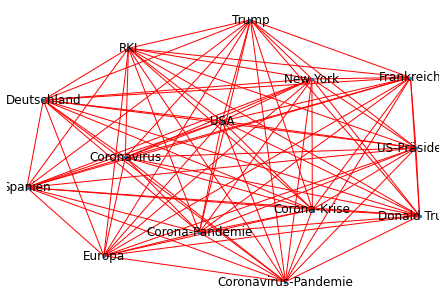

In [47]:
nx.draw(companies, nodepositions, node_size=5, edge_color="r", font_size=12, with_labels=True)
plt.show()

In [30]:
companies2 = nx.Graph()
for org_z in NERList2:
    companies2.add_node(org_z,size = orgs2[org_z])

for org_z in Relations2:
    for org_zw in Relations2[org_z]:
        if org_zw != org_z:
            companies2.add_edge(org_z, org_zw,  weight =  2 + math.log(Relations2[org_z][org_zw]))

In [31]:
# Get positions for the nodes in G
nodepositions2 = nx.spring_layout(companies2)

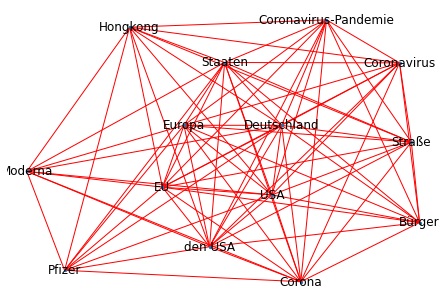

In [32]:
nx.draw(companies2, nodepositions2, node_size=5, edge_color="r", font_size=12, with_labels=True)
plt.show()

Zum Schluss versuche ich das ganze mit Plotly noch etwas schöner zu gestalten. Ich passe die Größe der Knoten an der Häufigkeit der Entitäten an und machne das Gleiche für die Stärke der Kanten.

Damit man am Ende ein schönes Ergebnis hat, muss man ein wenig mit den Funktionen für die Berechnung der Größen spielen.

In [48]:
# Make a node trace
node_trace = go.Scatter(x         = [],
                        y         = [],
                        text      = [],
                        textposition = "top center",
                        textfont_size = 9,
                        mode      = 'markers+text',
                        hoverinfo = 'none',
                        marker    = dict(color = [],
                                         size  = [],
                                         line  = None))
# For each node, get the position and size and add to the node_trace
for node in companies.nodes():
    x, y = nodepositions[node]
    node_trace['x'] += (x,) 
    node_trace['y'] += (y,) 
    node_trace['marker']['color'] += ('cornflowerblue',)
    node_trace['marker']['size'] += (3+0.8*orgs[node],) 
    node_trace['text'] += ('<b>' + node + '</b>',)
    
    
# Custom function to create an edge between node x and node y, with a given text and width
def make_edge(x, y, width):
    return  go.Scatter(x     = x,
                       y     = y,
                       line  = dict(width = width, color = 'cornflowerblue'),
                       mode  = 'lines')


# For each edge, make an edge_trace, append to list
edge_trace = []
for edge in companies.edges():
    org1 = edge[0]
    org2 = edge[1]
    x0, y0 = nodepositions[org1]
    x1, y1 = nodepositions[org2]
    linewidth = 0.1*Relations[org1][org2]**1.75
    trace  = make_edge([x0, x1, None], [y0, y1, None],  width = linewidth)
    edge_trace.append(trace)
    
    
# Customize layout
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)', # transparent background
    plot_bgcolor='rgba(0,0,0,0)', # transparent 2nd background
    xaxis =  {'showgrid': False, 'zeroline': False}, # no gridlines
    yaxis = {'showgrid': False, 'zeroline': False}, # no gridlines
)
# Create figure
fig = go.Figure(layout = layout)
# Add all edge traces
for trace in edge_trace:
    fig.add_trace(trace)
# Add node trace
fig.add_trace(node_trace)
# Remove legend
fig.update_layout(showlegend = False)
# Remove tick labels
fig.update_xaxes(showticklabels = False)
fig.update_yaxes(showticklabels = False)
# Show figure
fig.show()    

In [34]:
# Make a node trace
node_trace = go.Scatter(x         = [],
                        y         = [],
                        text      = [],
                        textposition = "top center",
                        textfont_size = 9,
                        mode      = 'markers+text',
                        hoverinfo = 'none',
                        marker    = dict(color = [],
                                         size  = [],
                                         line  = None))
# For each node, get the position and size and add to the node_trace
for node in companies2.nodes():
    x, y = nodepositions2[node]
    node_trace['x'] += (x,) 
    node_trace['y'] += (y,) 
    node_trace['marker']['color'] += ('cornflowerblue',)
    node_trace['marker']['size'] += (3+0.8*orgs[node],) 
    node_trace['text'] += ('<b>' + node + '</b>',)
    
    
# Custom function to create an edge between node x and node y, with a given text and width
def make_edge(x, y, width):
    return  go.Scatter(x     = x,
                       y     = y,
                       line  = dict(width = width, color = 'cornflowerblue'),
                       mode  = 'lines')


# For each edge, make an edge_trace, append to list
edge_trace = []
for edge in companies2.edges():
    org1 = edge[0]
    org2 = edge[1]
    x0, y0 = nodepositions2[org1]
    x1, y1 = nodepositions2[org2]
    linewidth = 0.1*Relations2[org1][org2]**1.75
    trace  = make_edge([x0, x1, None], [y0, y1, None],  width = linewidth)
    edge_trace.append(trace)
    
    
# Customize layout
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)', # transparent background
    plot_bgcolor='rgba(0,0,0,0)', # transparent 2nd background
    xaxis =  {'showgrid': False, 'zeroline': False}, # no gridlines
    yaxis = {'showgrid': False, 'zeroline': False}, # no gridlines
)
# Create figure
fig = go.Figure(layout = layout)
# Add all edge traces
for trace in edge_trace:
    fig.add_trace(trace)
# Add node trace
fig.add_trace(node_trace)
# Remove legend
fig.update_layout(showlegend = False)
# Remove tick labels
fig.update_xaxes(showticklabels = False)
fig.update_yaxes(showticklabels = False)
# Show figure
fig.show()    